# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*(numpy.sin(x))


Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    return -(x**2)*(numpy.cos(x)) + 2*x*numpy.sin(x) + 2*numpy.cos(x) - 2 

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [9]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
    N panels.
    '''
    Total = 0
    h = (xmax - xmin) / N
    if N == 1:
        return h/6*( f(xmin)+ 4*f(xmin + ((xmax-xmin)/2)) + f(xmax))
    else:
        for k in range(1, N + 1):
            x = xmin + (k * h)
            S = f(x)
            if k != N:
                S *= (2 + (2 * (k % 2)))
            Total += S
    return ((xmax - xmin) / (3 * N)) * Total

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


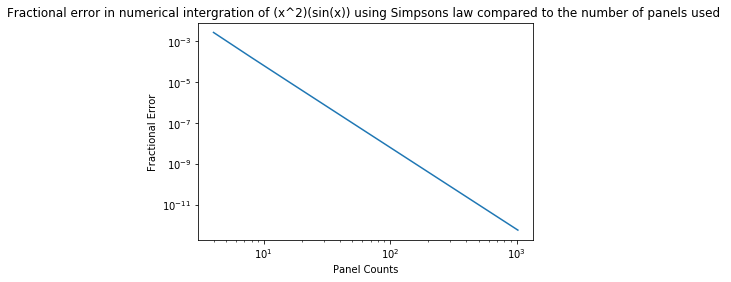

In [12]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]# Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = numpy.zeros(9)
for i in range (0,9):
    result_numeric[i] = integrate_numeric(x0, x1, panel_counts[i])
fractional_error = ((result_analytic - result_numeric)/ result_analytic) 
plt.plot(panel_counts, fractional_error)
plt.xlabel("Panel Counts")
plt.ylabel("Fractional Error")
plt.title("Fractional error in numerical intergration of (x^2)(sin(x)) using Simpsons law compared to the number of panels used ")
plt.yscale('log')
plt.xscale('log')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels used exponentially decreases the fractional error in the numerical method, this therefore increases the accuracy exponentially. The lower the fractional error is, the more accurate the numerical method as the difference between the actual analytically calculated value and the numerical value is smaller. 
When the number of panels becomes large the fractional error will begin to converge on around 10^-16 as this is the maximum number of digits that the programme can carry. However, if the number of panels is too large discrepancies will begin to accumulate which will result in an increase in the fractional error displayed.


If the trapezium rule was being used, how would the panel
count affect accuracy? 

The panel count would effect accuracy using the trapezium rule similarly to using Simpson’s rule, however when using the trapezium rule the error would approach 0 much later (the gradient of the line on the plot would be shallower). Hence it would take a much larger panel count to achieve a similar accuracy to the simpson's rule.